# **Machine Learning for Churn Prediction**

This notebook encompass the Extract, Transform, and load (ETL) and the Exploratory Data Analysis (EDA) phase. 

Importing necessary libraries and the Python file, `helper.py`, containing functions designed for a more streamlined and readable code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from sklearn.preprocessing import OneHotEncoder

# importing python file helpers.py
from helpers import *

## **Extract, Transform, and load (ETL)**

Fetching data from a specified URL using the `api_request` function, from `helper.py`, then flattening it using the `.json_normalize` function from pandas

In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

df = pd.json_normalize(api_request(url))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


We're doing the same steps as before, but this time using the `flatten` function, from `helper.py`, to simplify each dictionary we got from the list. After that, we turn the simplified data into a table format using pandas.

Both methods for processing the JSON response are effective; feel free to choose either approach.

In [3]:
response = api_request(url)
# Flattening each dictionary in the list
flattened_data = [flatten(d) for d in response]

# Convert to pandas DataFrame
df = pd.DataFrame(flattened_data)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Checking the data frame columns

In [4]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

Understanding the data type and searching for possible null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [6]:
df.isna().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

Iterating through each column of the DataFrame and printing its unique values for a quick assessment.

In [7]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : ['No' 'Yes' '']
customer_gender : ['Female' 'Male']
customer_SeniorCitizen : [0 1]
customer_Partner : ['Yes' 'No']
customer_Dependents : ['Yes' 'No']
customer_tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService : ['Yes' 'No']
phone_MultipleLines : ['No' 'Yes' 'No phone service']
internet_InternetService : ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity : ['No' 'Yes' 'No internet service']
internet_OnlineBackup : ['Yes' 'No' 'No internet service']
internet_DeviceProtection : ['No' 'Yes' 'No internet service']
internet_TechSupport : ['Yes' 'No' 'No internet service']
internet_StreamingTV : ['Yes' 'No' 'No internet service']
internet_StreamingMovies : ['No' 'Yes' 'No internet service']

Evaluating and addressing the missing data in the 'Churn' column, as identified in the previous code snippet

In [8]:
#  Percentage of rows without information of Churn
print(df.Churn.value_counts() / df.Churn.value_counts().sum())
df = df.loc[df['Churn'] !=  ""].reset_index(drop=True)

No     0.711986
Yes    0.257190
       0.030824
Name: Churn, dtype: float64


Transforming specific columns in the DataFrame by encoding categorical values like ('Yes', 'No', etc.) into numerical ones (1 or 0) for ease of analysis. After encoding, the initial rows of the DataFrame are displayed for verification.

In [9]:
dummy_columns = [
       'Churn', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 
       'account_Contract', 'account_PaperlessBilling', 
       'account_PaymentMethod'
       ]

dummy_dict = {
                'Yes': 1,
                'No': 0, 
                'No phone service': 0, 
                'No internet service': 0}

df[dummy_columns] = df[dummy_columns].replace(dummy_dict)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


Assesing the unique values again.

In [10]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : [0 1]
customer_gender : ['Female' 'Male']
customer_SeniorCitizen : [0 1]
customer_Partner : [1 0]
customer_Dependents : [1 0]
customer_tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_PhoneService : [1 0]
phone_MultipleLines : [0 1]
internet_InternetService : ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity : [0 1]
internet_OnlineBackup : [1 0]
internet_DeviceProtection : [0 1]
internet_TechSupport : [1 0]
internet_StreamingTV : [1 0]
internet_StreamingMovies : [0 1]
account_Contract : ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling : [1 0]
account_PaymentMethod : ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account_Charges_Monthl

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64

Converting the data type of the ``account_Charges_Total`` column from ``object`` to ``float64`` to facilitate numerical analysis, as this column represents a numeric value

In [12]:
df['account_Charges_Total'] = df['account_Charges_Total'].apply(pd.to_numeric, errors='coerce')
df['account_Charges_Total'].dtypes

dtype('float64')

Getting descriptive statistics for numeric variables

In [13]:
df[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
account_Charges_Monthly,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
account_Charges_Total,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [14]:
df.isna().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64

Upon examining the data entries where ``account_Charges_Total`` is NaN, we observe that these correspond to new clients. This inference is drawn from the ``tenure`` column, which indicates the number of months a client has been with the company. All these entries have a value of 0, signifying new clients without any contract history. Consequently, we can replace these NaN values with 0

In [15]:
df[df['account_Charges_Total'].isna()]

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
945,1371-DWPAZ,0,Female,0,1,1,0,0,0,DSL,...,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN
1731,2520-SGTTA,0,Female,0,1,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN
1906,2775-SEFEE,0,Male,0,0,1,0,1,1,DSL,...,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,NaN
2025,2923-ARZLG,0,Male,0,1,1,0,1,0,No,...,0,0,0,0,0,One year,1,Mailed check,19.70,NaN
2176,3115-CZMZD,0,Male,0,0,1,0,1,0,No,...,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN
2250,3213-VVOLG,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN
2855,4075-WKNIU,0,Female,0,1,1,0,1,1,DSL,...,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN
3052,4367-NUYAO,0,Male,0,1,1,0,1,1,No,...,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN
3118,4472-LVYGI,0,Female,0,1,1,0,0,0,DSL,...,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN
4054,5709-LVOEQ,0,Female,0,1,1,0,1,0,DSL,...,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN


In [16]:
df['account_Charges_Total'] = df['account_Charges_Total'].fillna(0)

In [17]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

Utilizing the `encoder` function from `helper.py` to apply one-hot encoding to columns like 'customer_gender', 'internet_InternetService', 'account_Contract', and 'account_PaymentMethod'. Since these columns contain multiple categories, one-hot encoding ensures better model interpretation and performance.

In [18]:
one_hot_enconding_columns = ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']

df_encoded = encoder(df, one_hot_enconding_columns) # Utilizing the function encoder defined in the helper.py to encode the columns in the list
df_encoded.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,65.6,593.30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,59.9,542.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,73.9,280.85,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,98.0,1237.85,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,83.9,267.40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Storing the `df` and `df_encoded` DataFrame for use in model development within another notebook, following the Exploratory Data Analysis (EDA) phase.


In [34]:
df_encoded.to_csv('data\churn_data.csv')
df_encoded.to_csv('data\encoded_churn_data.csv')

## **Exploratory Data Analysis (EDA)**

Now that we have succesfully finished the ETL process, is time to peform some EDA. Here we aim to understand the correlations of our data and find patterns that might be helpfull in the model building phase.

### **Analyzing Variable Distribution**

#### Target Variable

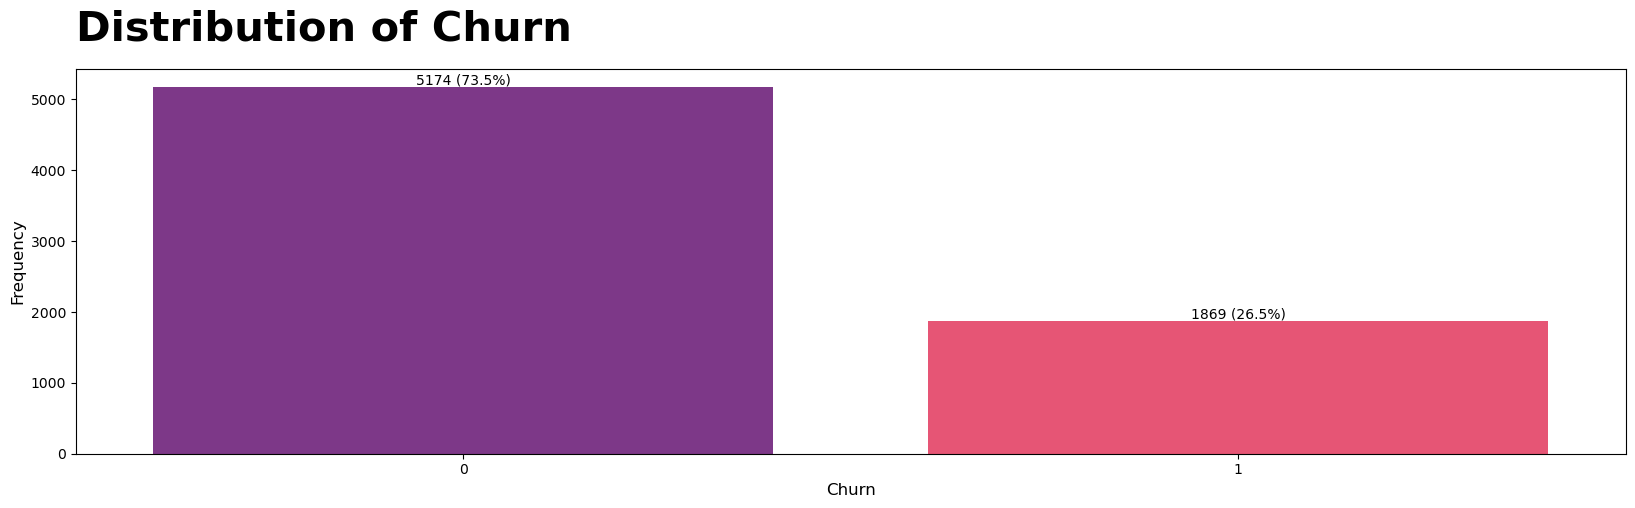

In [20]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Churn', data=df, palette=binary_palette)
ax.set_title('Distribution of Churn', size=30, loc='left', fontweight='bold', pad=20)
ax.set_xlabel('Churn', size=12)
ax.set_ylabel('Frequency', size=12)

label_bars(ax) # function to label the data


plt.show()

We'll probably need to address this undersampling of churn values during the model building phase. One option is to use over sampling techniques.

#### Categorical Variables

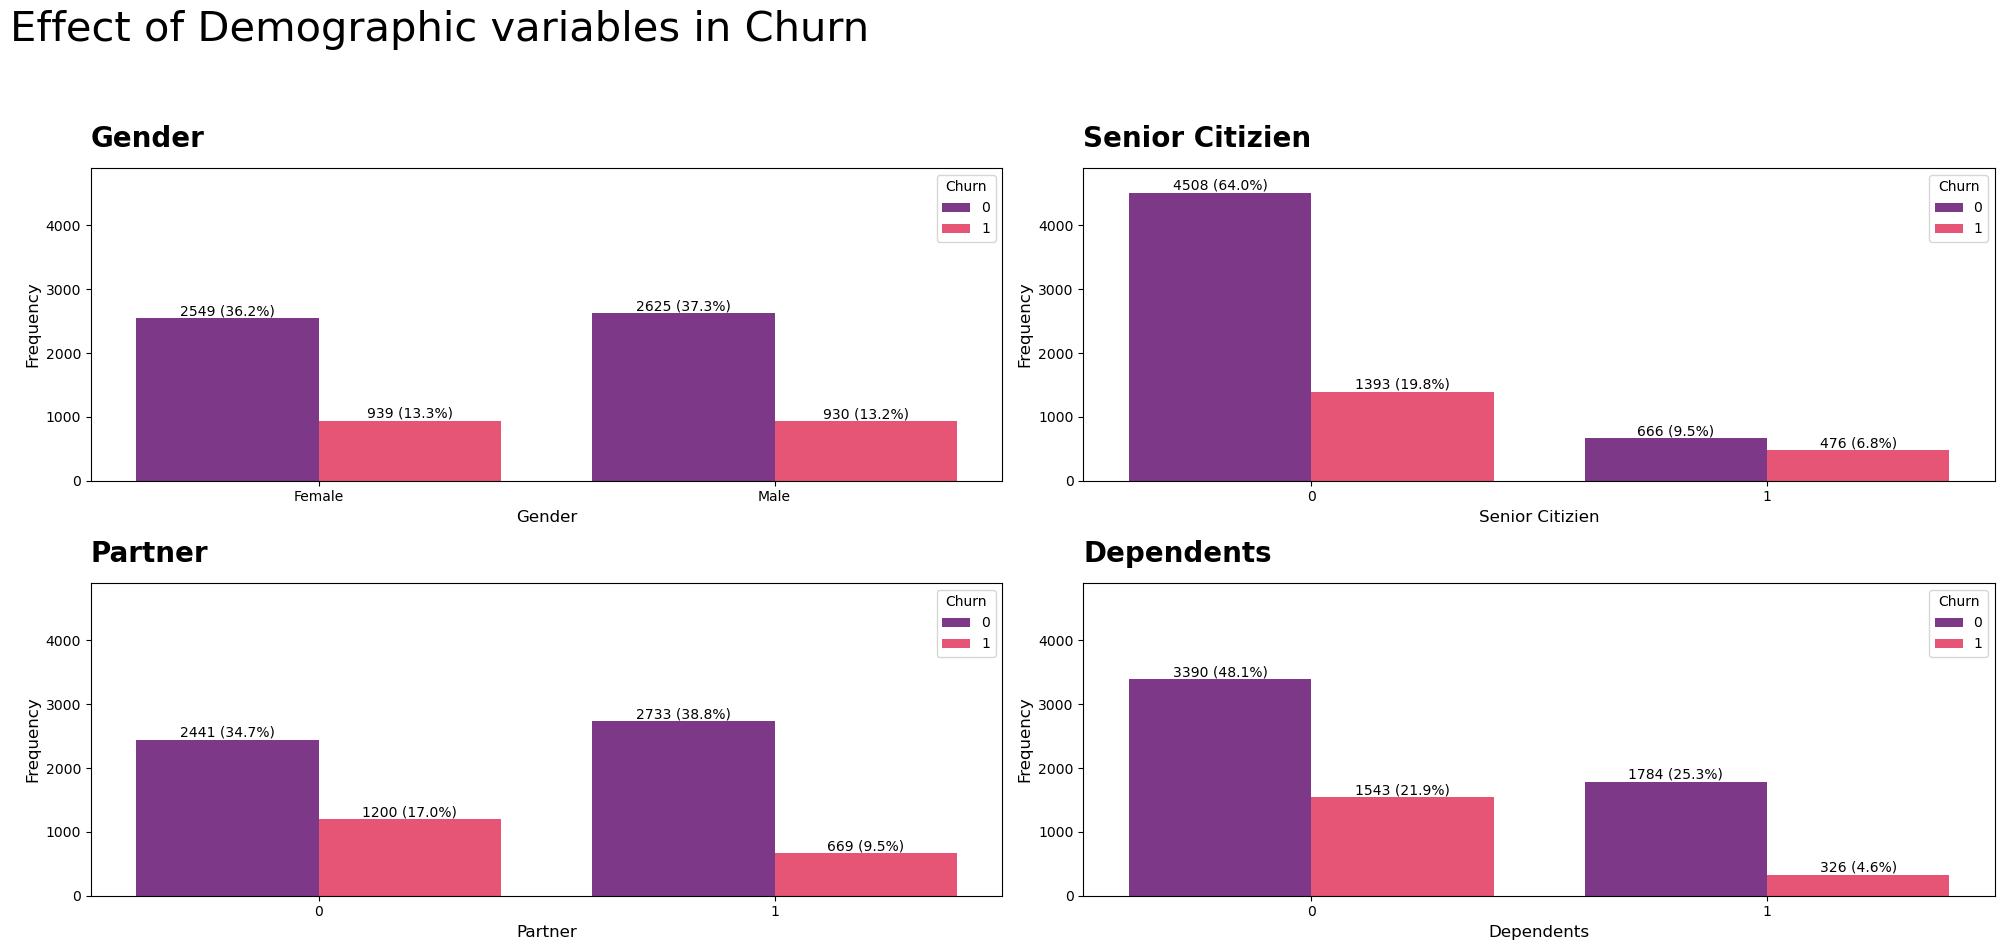

In [21]:
demographic_columns = [('customer_gender', 'Gender'), ('customer_SeniorCitizen', 'Senior Citizien'), ('customer_Partner', 'Partner'), ('customer_Dependents', 'Dependents')]

plt.figure(figsize=(20,9))
plt.suptitle('Effect of Demographic variables in Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', demographic_columns, df) # Function to plot countplot with the target varible as hue

**Insights**

- Gender does not seem to affect Churn
- Costumers older than 65 years are more likely to Churn
- Clients that have an partner are less likely to Churn
- Clients with dependents are less likely to Churn

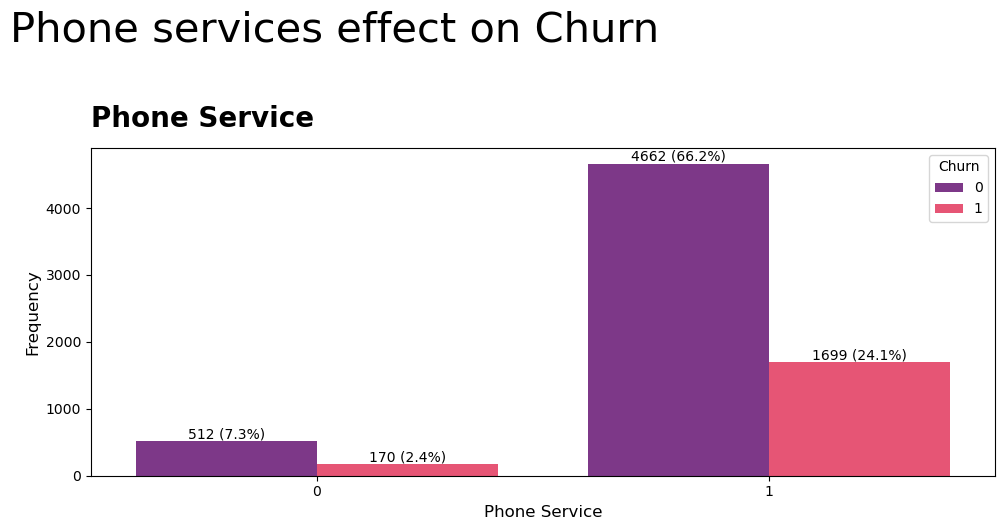

In [22]:
phone_columns = [('phone_PhoneService', 'Phone Service')]

plt.figure(figsize=(10,5))
plt.suptitle('Phone services effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', phone_columns, df) # Function to plot countplot with the target varible as hue

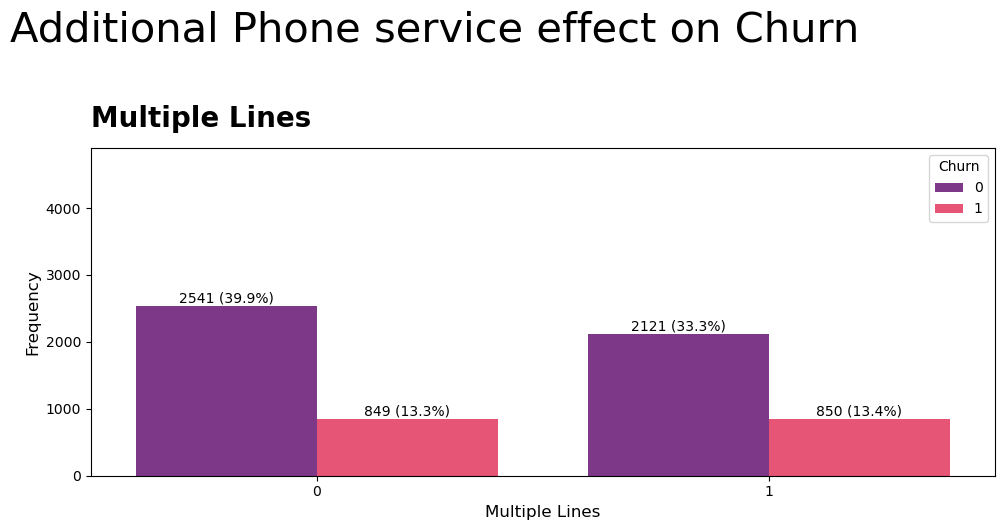

In [23]:
phone_columns = [('phone_MultipleLines', 'Multiple Lines')]

plt.figure(figsize=(10,5))
plt.suptitle('Additional Phone service effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', phone_columns, df[df['phone_PhoneService']==1]) # Function to plot countplot with the target varible as hue

**Insights**

- The 'Phone Service' feature appears to have a minimal impact on the Churn rate, though it might contribute slightly to its variance

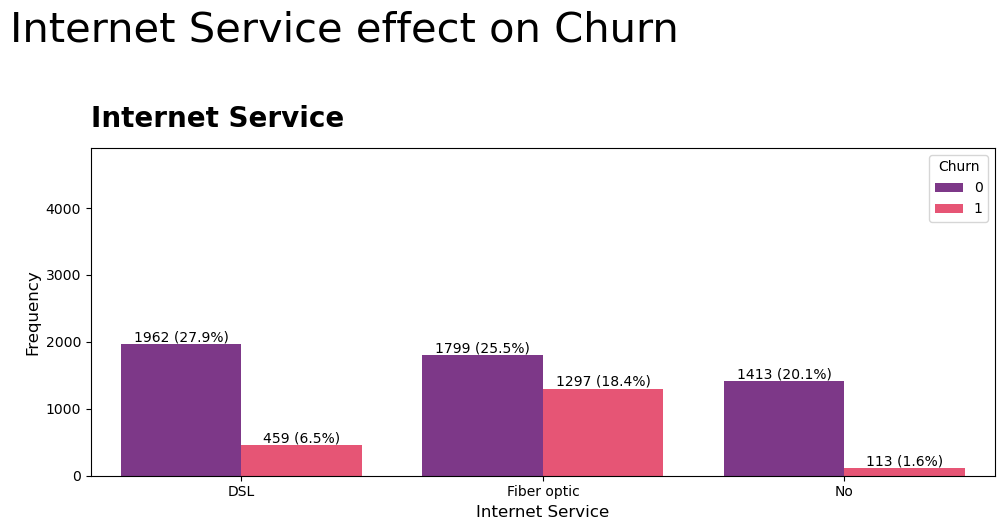

In [24]:
internet_columns = [('internet_InternetService', 'Internet Service')]

plt.figure(figsize=(10,5))
plt.suptitle('Internet Service effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df) # Function to plot countplot with the target varible as hue

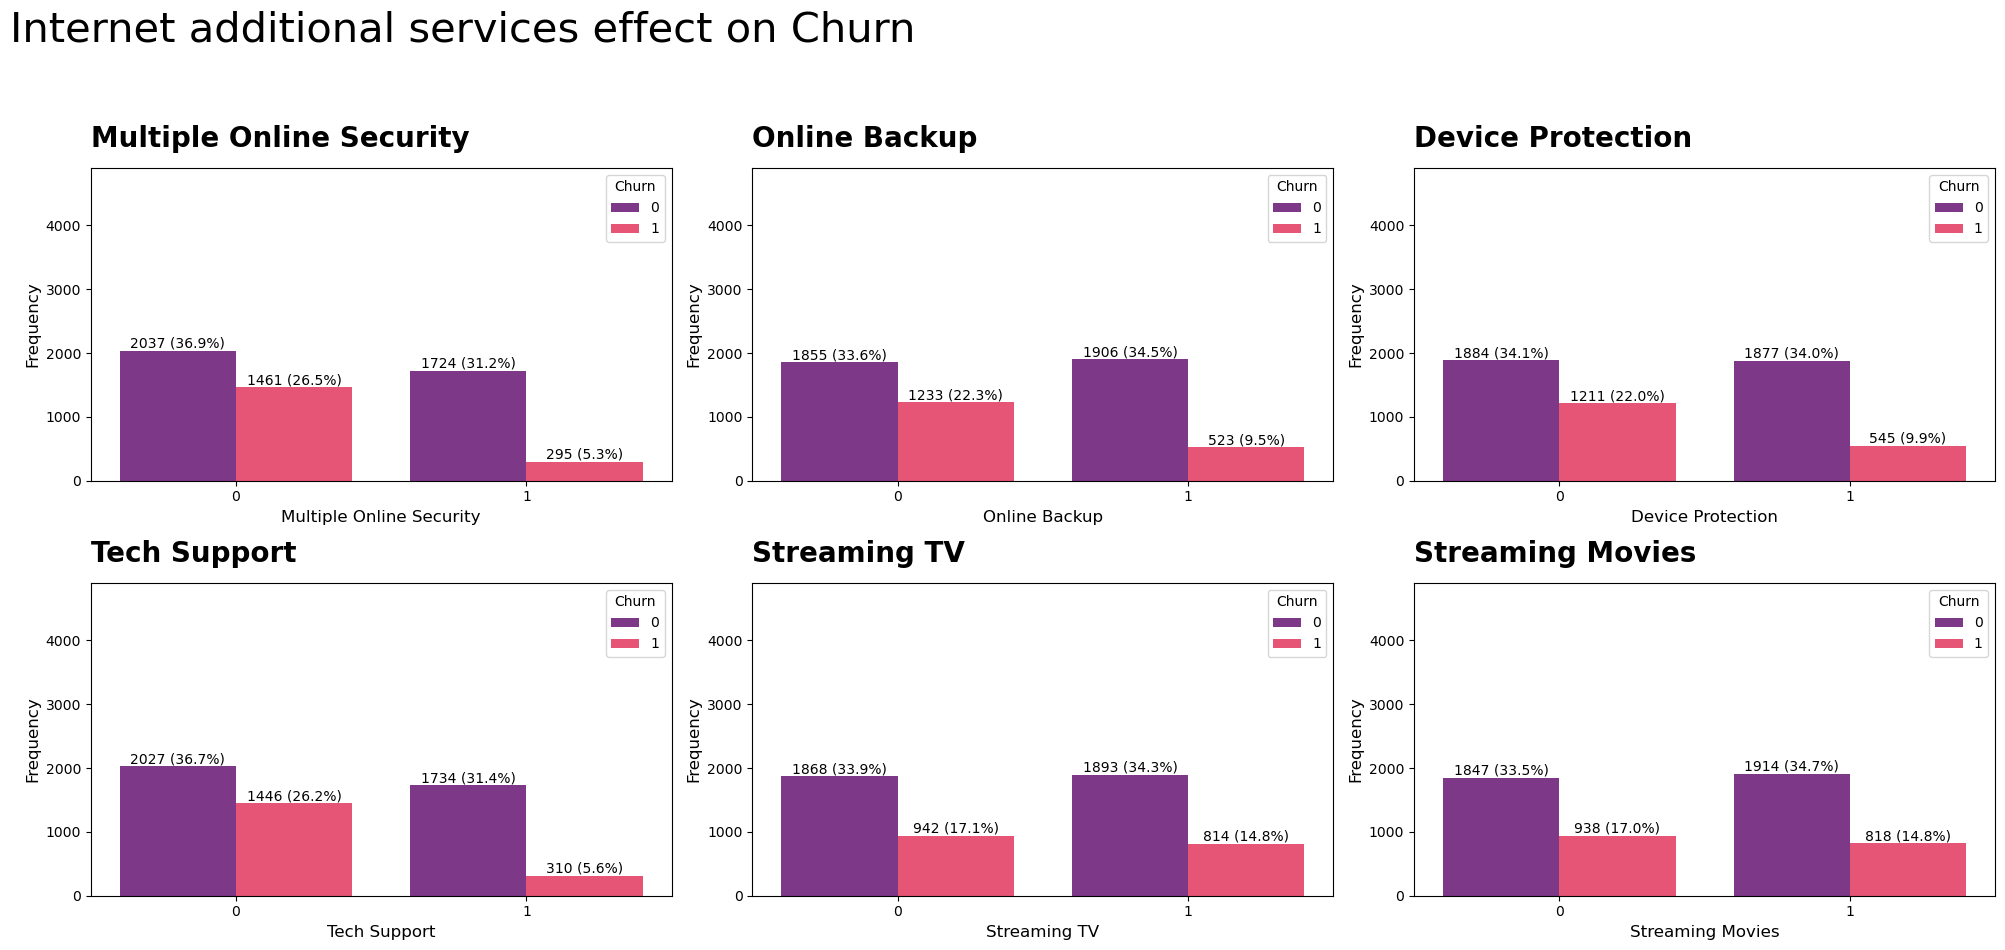

In [25]:
internet_columns = [('internet_OnlineSecurity', 'Multiple Online Security'), ('internet_OnlineBackup', 'Online Backup'), ('internet_DeviceProtection', 'Device Protection'),
                ('internet_TechSupport', 'Tech Support'), ('internet_StreamingTV', 'Streaming TV'), ('internet_StreamingMovies', 'Streaming Movies')]

plt.figure(figsize=(20,9))
plt.suptitle('Internet additional services effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df[df['internet_InternetService'] != 'No']) # Function to plot countplot with the target varible as hue

**Insights**

- Costumer with fiber optic service have extremeally high Churn rate, this might indicate a poor service quality. The same goes for DSL service but in a smaller scale.
- The addiiontal internet services that seems to be more releated to Churn are: Multiple online secutiry, Online Backup, device protection and tech suport

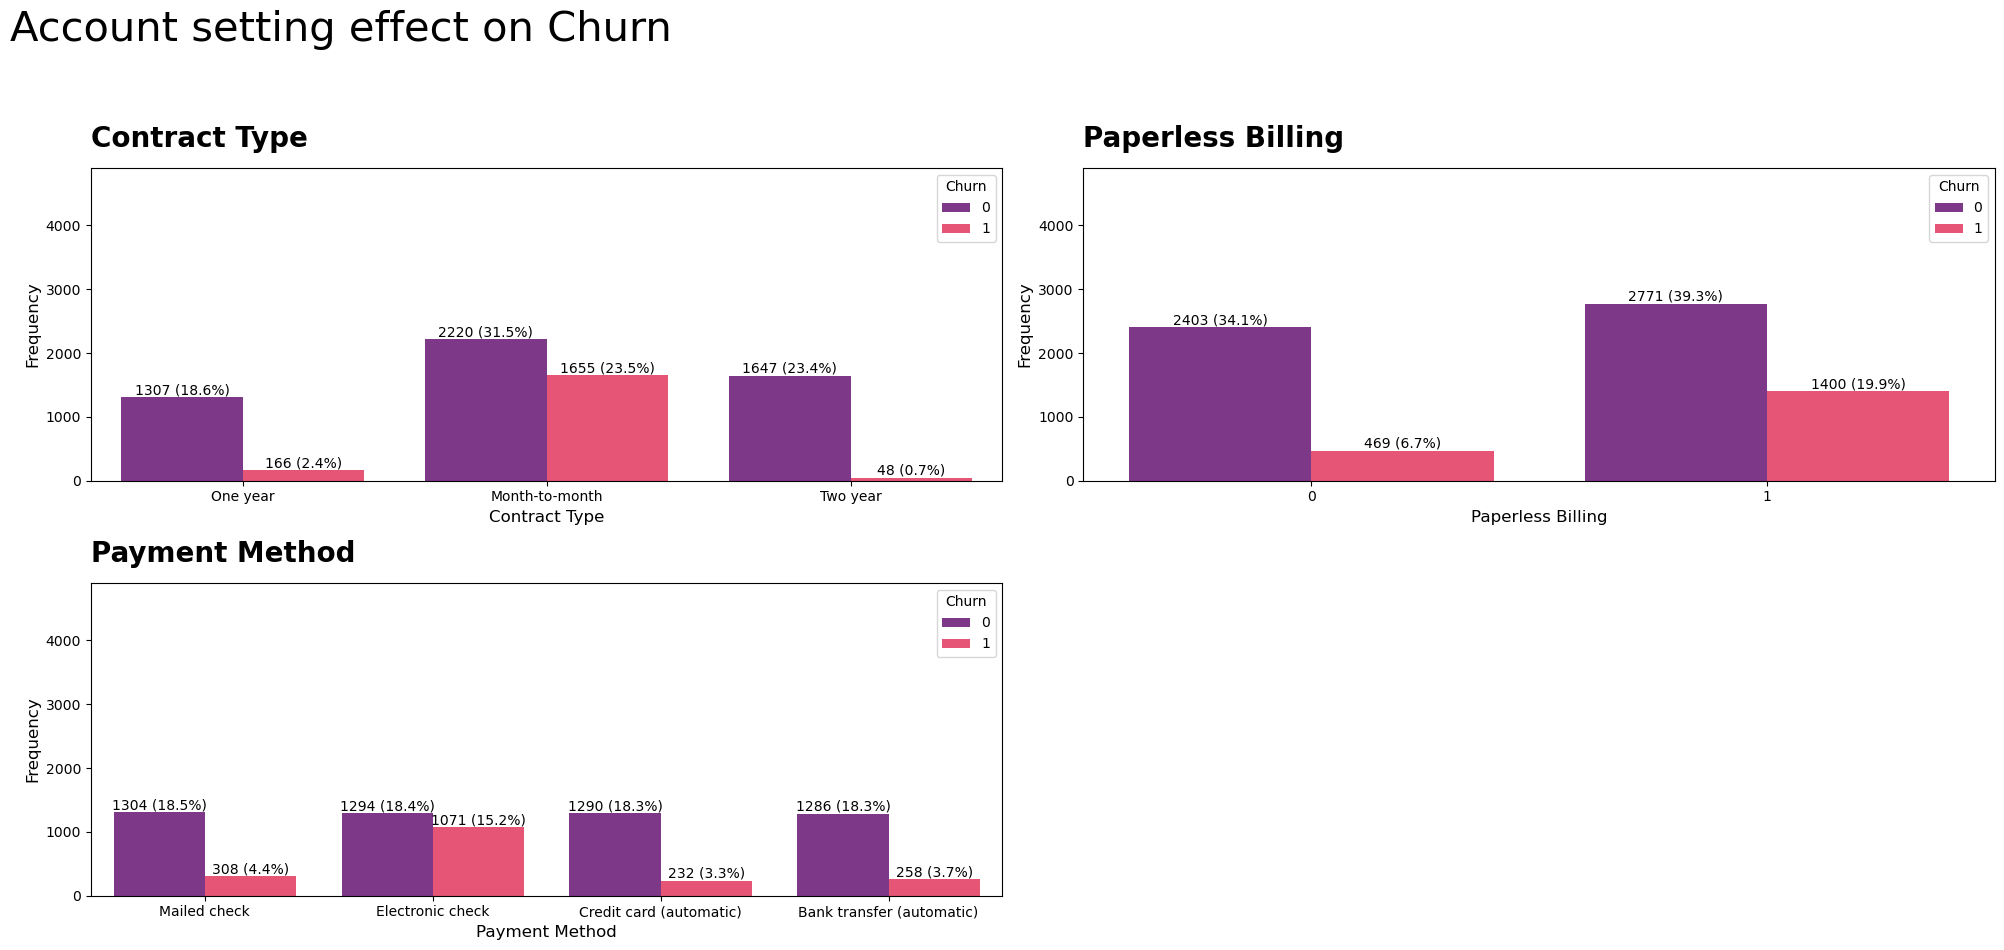

In [26]:
internet_columns = [('account_Contract', 'Contract Type'), ('account_PaperlessBilling', 'Paperless Billing'), ('account_PaymentMethod', 'Payment Method')]

plt.figure(figsize=(20,9))
plt.suptitle('Account setting effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df) # Function to plot countplot with the target varible as hue

**Insights**

- **Contract Type & Churn:** The type of contract is strongly associated with customer churn. Notably, customers with month-to-month contracts are much more inclined to leave the bank compared to those on one-year or two-year contracts.

- **Paperless Billing:** Customers who opt for paperless billing seem to have a higher churn rate. A deeper analysis is necessary to decipher the underlying reasons for this trend.

- **Electronic Check Payments:** Using electronic checks as a payment method appears to correlate with higher customer churn. A more detailed exploration is warranted to understand the cause of this relationship.



#### Numeric Variables

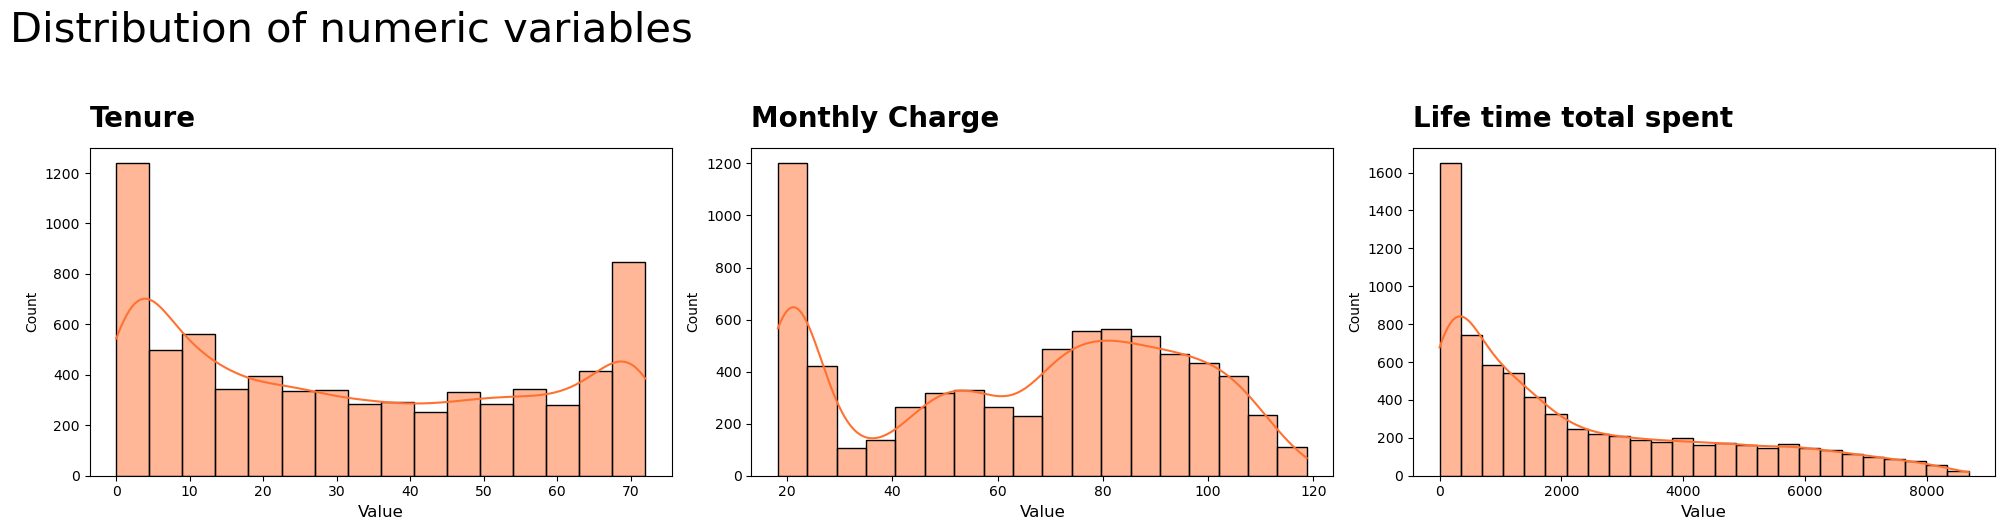

In [27]:
numeric_columns = [('customer_tenure', 'Tenure'), ('account_Charges_Monthly', 'Monthly Charge'), ('account_Charges_Total', 'Life time total spent')]

plt.figure(figsize=(20,5))
plt.suptitle('Distribution of numeric variables', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(numeric_columns):
    ax = plt.subplot(1, 3, n+1)
    ax = sns.histplot(x=col[0], data=df, color='#ff7131', kde=True)

    ax.set_title(f'{col[1]}', size=20, loc='left', fontweight='bold', pad=15)
    ax.set_xlabel('Value', size=12)

plt.tight_layout()
plt.show()

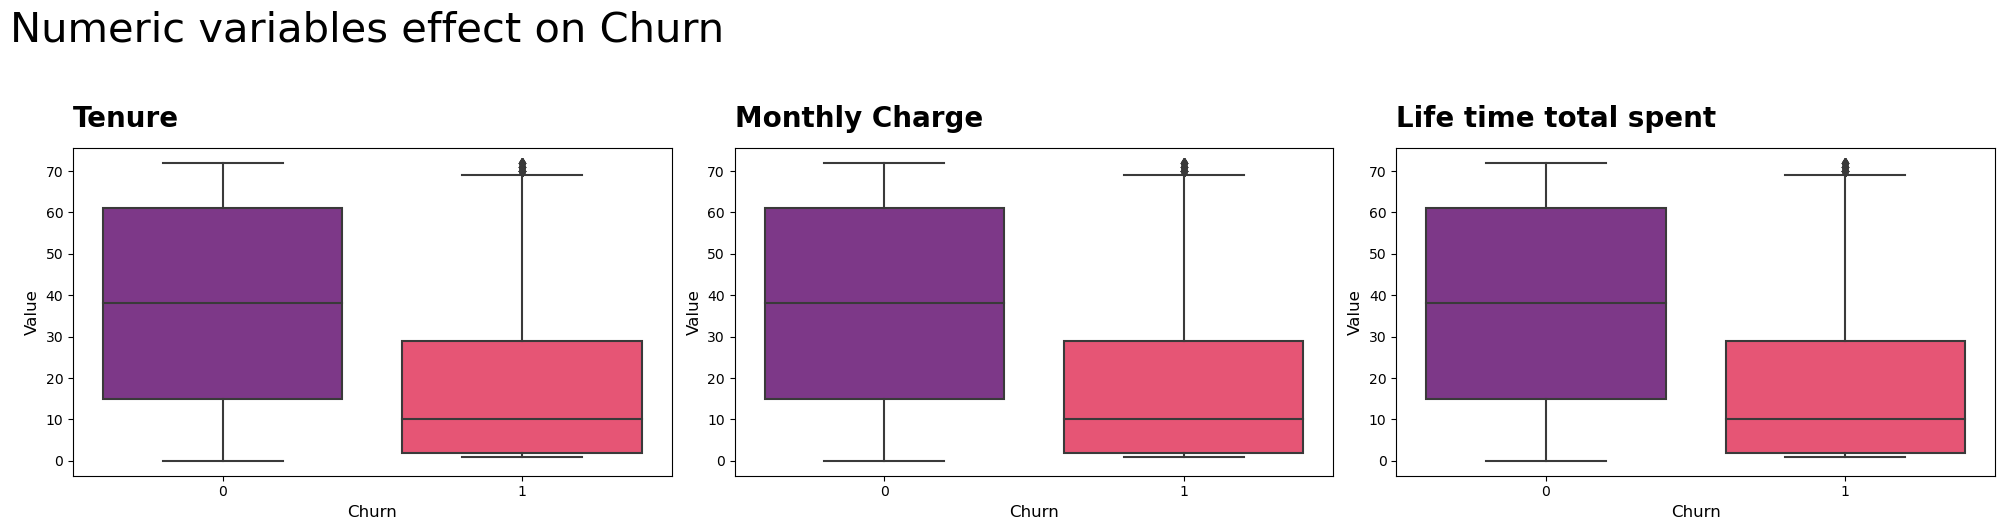

In [30]:
numeric_columns = [('customer_tenure', 'Tenure'), ('account_Charges_Monthly', 'Monthly Charge'), ('account_Charges_Total', 'Total historical expenses')]

plt.figure(figsize=(20,5))
plt.suptitle('Numeric variables effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(numeric_columns):
    ax = plt.subplot(1, 3, n+1)
    ax = sns.boxplot(y='customer_tenure', x='Churn', data=df, palette=binary_palette)

    ax.set_title(f'{col[1]}', size=20, loc='left', fontweight='bold', pad=15)
    ax.set_xlabel('Churn', size=12)
    ax.set_ylabel('Value', size=12)

plt.tight_layout()
plt.show()

**Insights**

- **Tenure:** CCustomers with longer tenures, higher monthly charges, or greater total lifetime expenditures tend to churn less frequently.
- **Monthly Charge & Total historical expenses:** Both monthly charges and total lifetime expenditures appear to be related to customer churn. Customers who churned generally have lower values for these metrics. The lower lifetime expenditure among churned customers can be attributed to the fact that they typically spend less time (and therefore, money) with the company compared to those who remain loyal.

#### Correlation

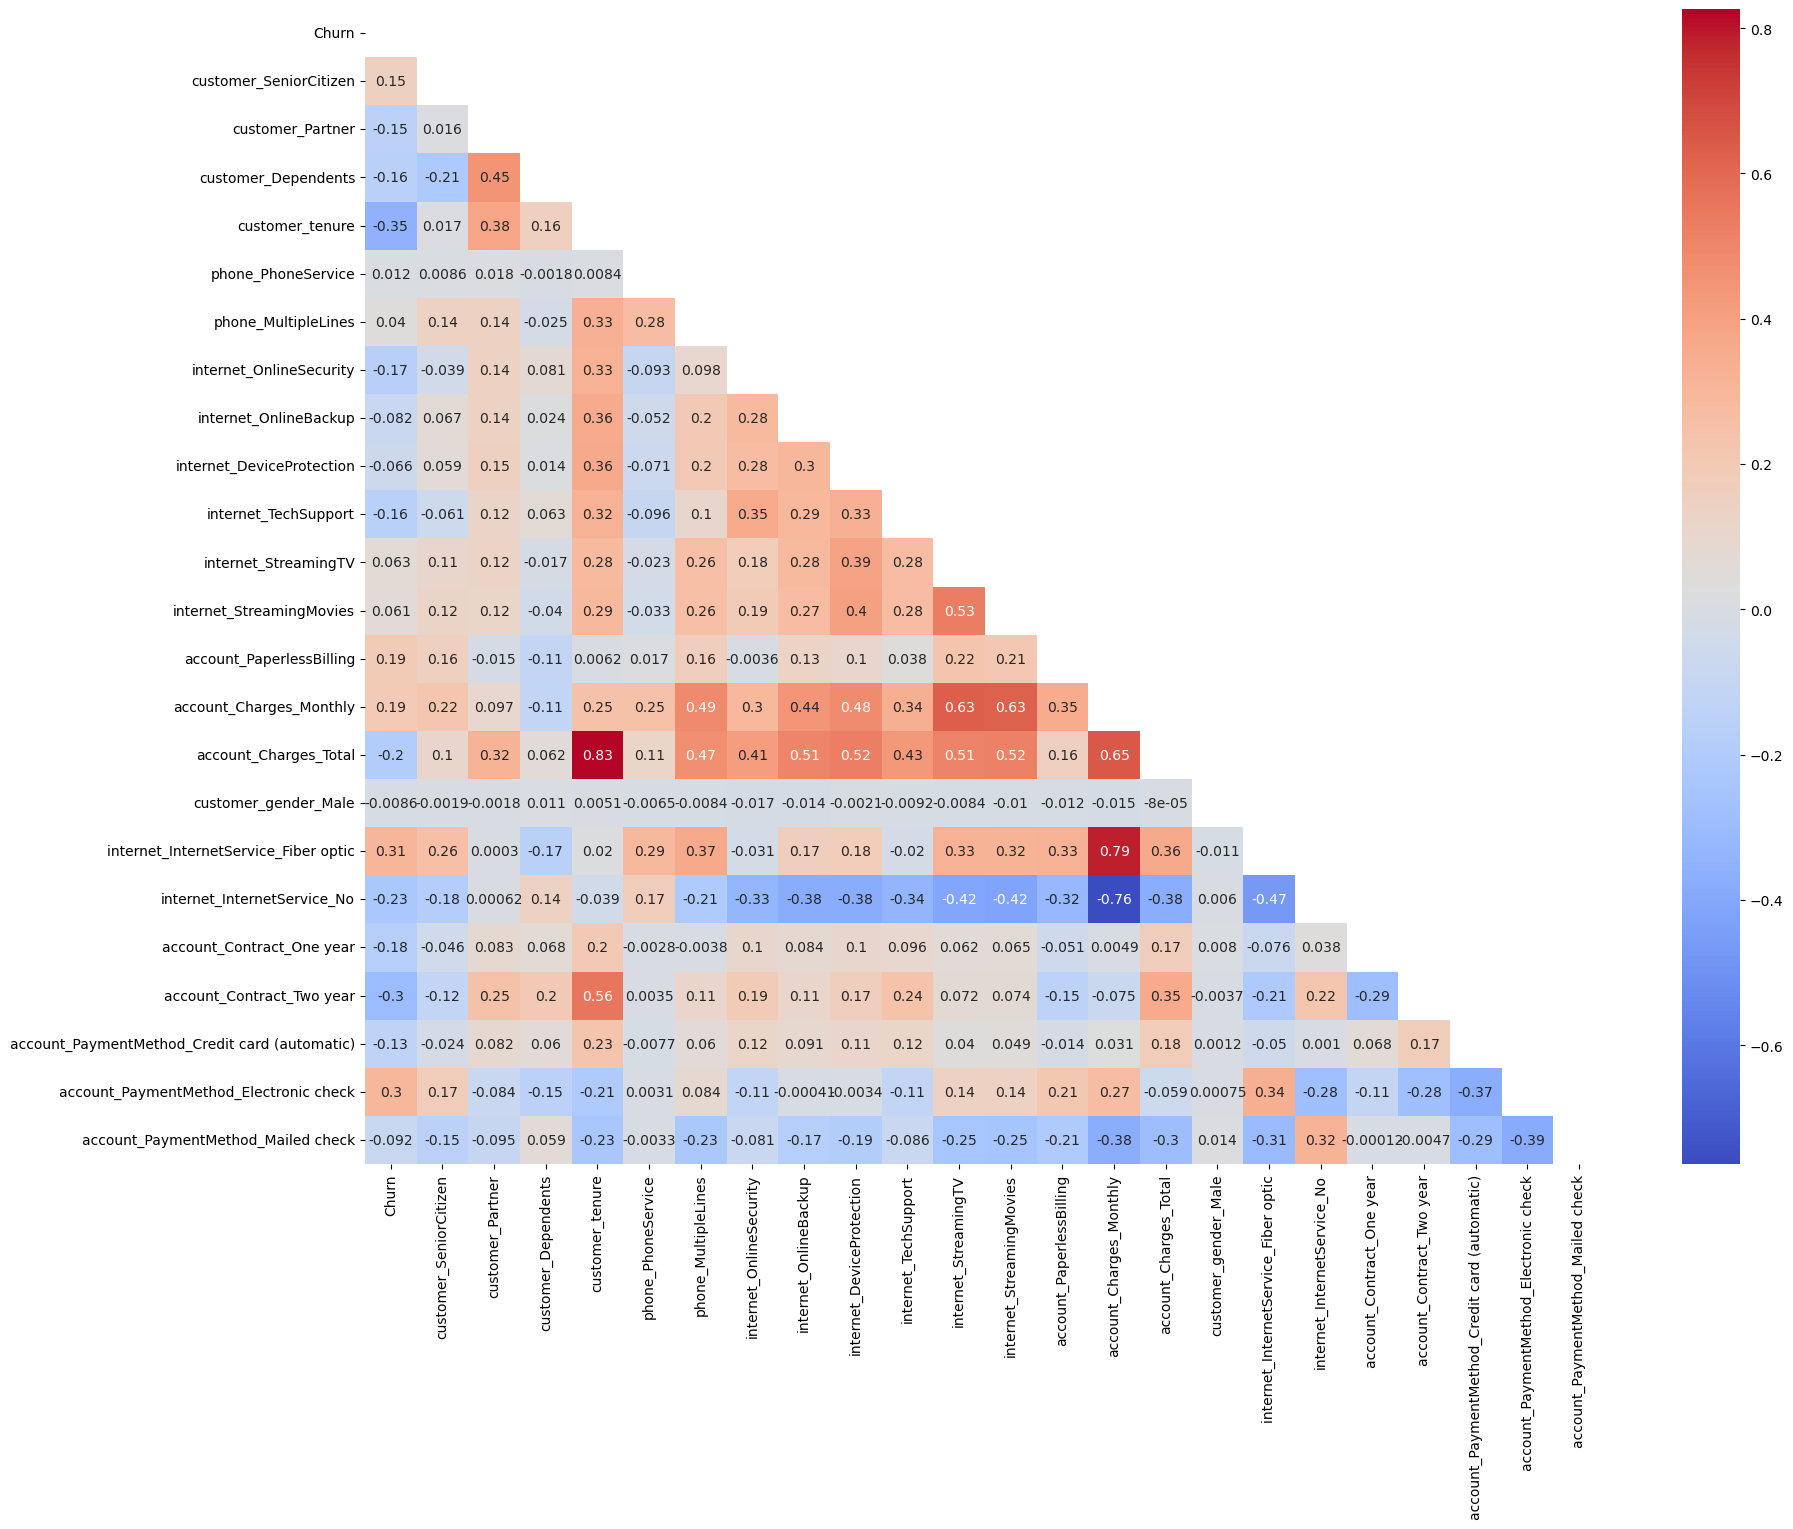

In [29]:
corr = df_encoded.corr()

# Create a mask for the upper triangle
mask_upper = np.triu(np.ones_like(corr, dtype=bool))

# Combine the masks
final_mask = mask_upper

plt.figure(figsize=(20,15))
sns.heatmap(data=corr, annot=True, mask=final_mask, cmap='coolwarm')

plt.show()


**Insights**

- It seems that the independent variables are not higly correlated. And in addition it seems that we might have to solve some multiocolinearity problems between independent features, such as, costumer_tenure and account_Charges_Total